In [4]:
import pandas as pd
import seaborn as sns
from reviews import Reviews

REVIEWS_FILENAME = "./data/reviews.csv"

In [5]:
reviews = Reviews(filename=REVIEWS_FILENAME)
reviews.get_all_genres()

{'garage punk',
 'incredibly lackluster internet rap with gimmicky vocals',
 'southern soul',
 'futuristic neo-soul',
 'psychedelic',
 'cloud rap?',
 'blackened industrial doom rock spoken word yeah',
 'chamber music',
 'goth rock',
 'folk hop',
 'space rock',
 'memphis rap',
 'ambient dub',
 'minimal wave',
 'chillwave vibes',
 'funeral rave',
 'creepy covers',
 'kinda shoegaze',
 'slick singer-songwriter dude',
 'arena rock',
 'dark jazz',
 'trap rap',
 'melodic metalcore',
 'soft jazz pop',
 'absurdist post-modernism',
 'pop rap with trap vibes on the instrumentals',
 'electrofunk',
 'ambient house',
 'futurepop',
 'crossover',
 'power noise',
 'orchestral rap',
 'jangle pop',
 'electro-afro-funk',
 'minimalist groove jazz',
 "lo-fi rock 'n' roll",
 'wtf is going on mark?',
 'deconstructed club',
 'breakbeat electronica',
 'tech house',
 'new jack swing',
 'wordy rock',
 'experimental choral music',
 'heavy metal',
 '"post-rock," art rock',
 'abstract hip hp',
 'neo-soul',
 'sad hip

In [6]:
reviews.get_by_genre_substr("pop").mean_rating()

(5.9267676767676765, 792)

In [7]:
POPULAR_GENRES = [
    "pop", 
    "hip hop",
    "electronic", 
    "rock",
    "r&b",
    "country", 
    "metal",
    "singer-songwriter",
    "folk",
    "indie",
    "ambient",
    "soul",
    "funk",
    "house",
    "punk",
    "industrial",
    "psychedelic"
]

[Text(0.5, 1.0, 'Mean ratings for popular genres')]

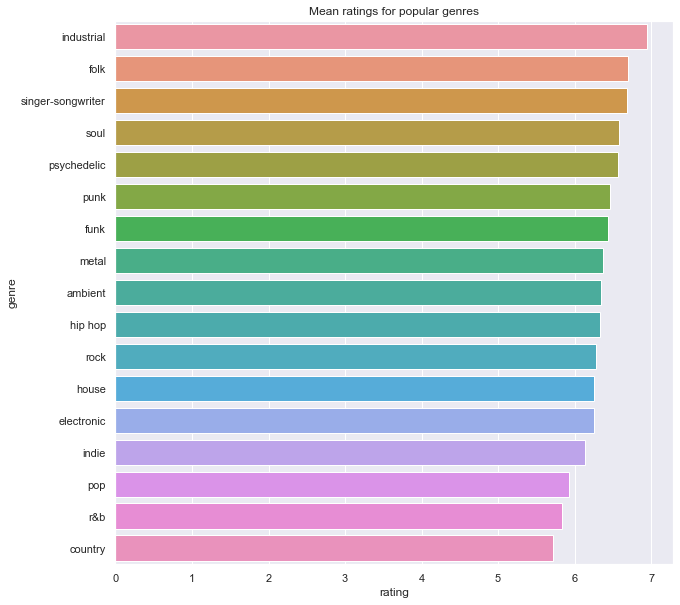

In [9]:
data = [(genre, reviews.get_by_genre_substr(genre).mean_rating()) for genre in POPULAR_GENRES]
data = [(genre, rating, num_reviews) for (genre, (rating, num_reviews)) in data]

df = pd.DataFrame(data, columns=["genre", "rating", "num_reviews"]).sort_values("rating", ascending=False)

sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x="rating", y="genre", data=df, estimator=sum).set(title='Mean ratings for popular genres')
